**Hello everyone.This is a notebook comparing various regression models such as Ridge,Knn,Bayesian Regression,Decision Tree and SVM.**
*It is extremely beneficial for beginners to take a close look at the notebook so as to get an insight as to how different algorithms work and also which algorithms can perform better in some cases depending upon cases*

In [36]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [37]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# import statsmodels.formula.api as smf
# import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn.preprocessing import normalize
from xgboost import XGBRegressor
import torch
import torch.nn as nn
import torch.optim as optim
%matplotlib inline

In [39]:
system='al_sn_liquid_1/al_sn_liquid_1'
f = pd.read_csv(f"{system}.txt", delimiter='\t')
#f = pd.read_csv("nb_temp_gibbs.txt", delimiter=' ')

In [40]:
data=DataFrame(f)
# all columns
# 'Gibbs_energy','Mass_fraction_Nb','Mass_fraction_Al','Mass_fraction_Ti','Mass_fraction_Mo','Mass_fraction_Fe','Mass_fraction_Ni','Mass_fraction_Cr','Temperature_[K]','temp_class'
# our_cols=['Gibbs_energy','Mass_fraction_Nb','Mass_fraction_Al','Mass_fraction_Ti','Mass_fraction_Mo','Mass_fraction_Fe','Mass_fraction_Ni','Mass_fraction_Cr','Temperature_[K]']
# data=data.reindex(columns=our_cols)
data.head()[:2]

,Mole_fraction_Sn,Temperature,Gibbs_energy
0,0.0,300,-97440900.0
1,0.0,310,-135517000.0


*Getting non-object elements*


In [41]:
X_data=data.dtypes[data.dtypes!='object'].index
X_train=data[X_data]
#X_train = normalize(X_train)
#X_train_pd = pd.DataFrame(X_train, columns=X_data.)
X_train.head()[:2]

,Mole_fraction_Sn,Temperature,Gibbs_energy
0,0.0,300,-97440900.0
1,0.0,310,-135517000.0


In [42]:
X_train.describe()

,Mole_fraction_Sn,Temperature,Gibbs_energy
count,10201.000000,10201.000000,1.020100e+04
mean,0.500000,800.000000,-2.897494e+09
std,0.291562,291.561886,1.789229e+09
min,0.000000,300.000000,-6.111660e+09
25%,0.250000,550.000000,-4.443970e+09
50%,0.500000,800.000000,-2.939210e+09
75%,0.750000,1050.000000,-1.228300e+09
max,1.000000,1300.000000,-9.744090e+07


In [43]:
# Finding all the columns with NULL values

np.sum(X_train.isnull())

/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Mole_fraction_Sn    0
Temperature         0
Gibbs_energy        0
dtype: int64

In [44]:
# Filling all Null values
X_train=X_train.fillna(0)
columns=X_train.columns.tolist()
y=X_train['Gibbs_energy']
#X_train.drop(['Gibbs_energy_1','Gibbs_energy_2'],axis=1,inplace=True)
X_train.drop(['Gibbs_energy',],axis=1,inplace=True)
X_train.head()[:2]

,Mole_fraction_Sn,Temperature
0,0.0,300
1,0.0,310


In [45]:
X_train

,Mole_fraction_Sn,Temperature
0,0.0,300
1,0.0,310
2,0.0,320
3,0.0,330
4,0.0,340
...,...,...
10196,1.0,1260
10197,1.0,1270
10198,1.0,1280
10199,1.0,1290


<Axes: >

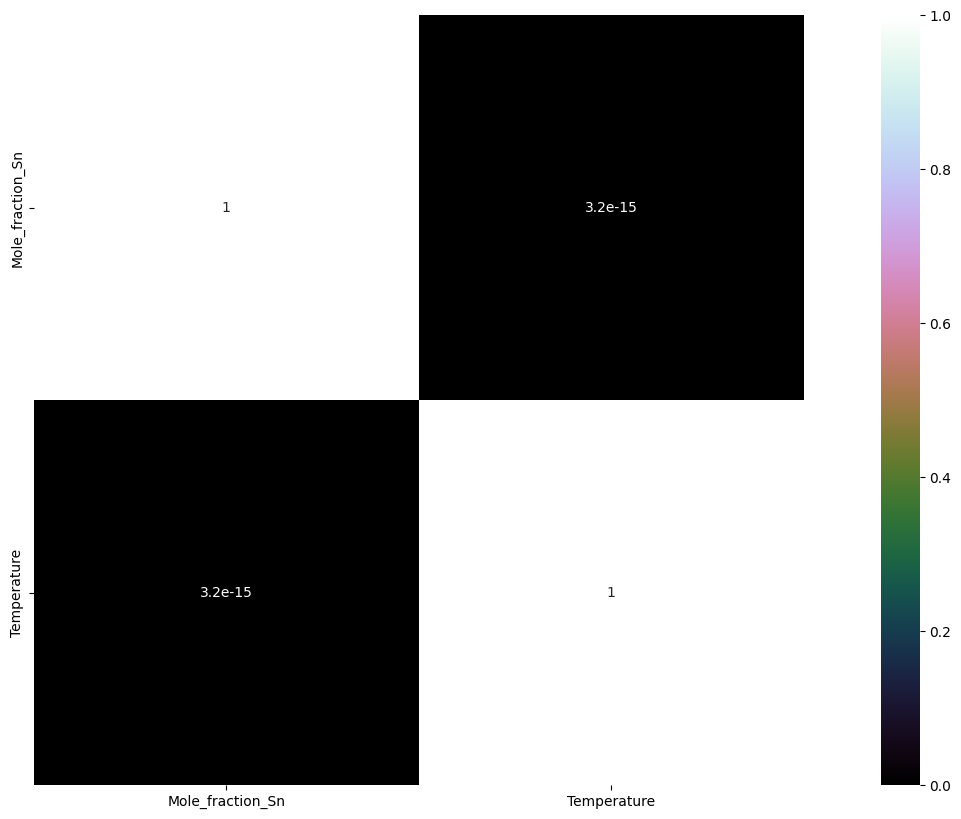

In [11]:
# GETTING Correllation matrix
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [46]:
X_Train=X_train.values
X_Train=np.asarray(X_Train)
# Finding normalised array of X_Train
#X_std=StandardScaler().fit_transform(X_Train)
# X_std=MinMaxScaler().fit_transform(X_Train)
y_2d = np.reshape(y,(y.shape[0],1))
#y_std=StandardScaler().fit_transform(y_2d)
# y_std=MinMaxScaler().fit_transform(y_2d)

X_std = X_Train
y_std = y_2d

In [47]:
print(X_std,y_std)

[[0.00e+00 3.00e+02]
 [0.00e+00 3.10e+02]
 [0.00e+00 3.20e+02]
 ...
 [1.00e+00 1.28e+03]
 [1.00e+00 1.29e+03]
 [1.00e+00 1.30e+03]] [[-9.74409e+07]
 [-1.35517e+08]
 [-1.74256e+08]
 ...
 [-5.80917e+09]
 [-5.86855e+09]
 [-5.92802e+09]]


TypeError: _AxesBase.set_xlim() takes from 1 to 3 positional arguments but 4 were given

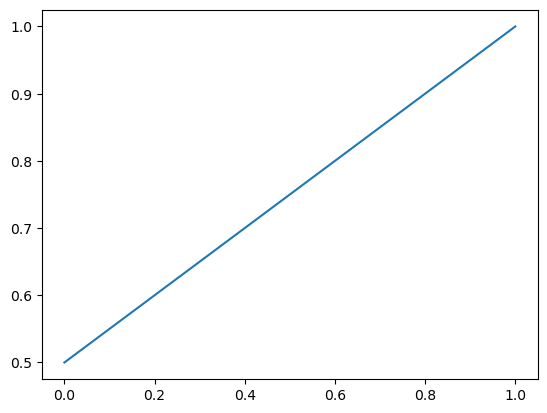

In [15]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Since 5 components can explain more than 70% of the variance, we choose the number of the components to be 5**

In [136]:
from sklearn.model_selection import train_test_split

# Assuming X_std and y_std are your feature and target arrays

# Parameters
prop_samples_for_train = 0.75

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X_std, 
    y_std, 
    test_size=1 - prop_samples_for_train,  # Proportion of the data to be used for testing
      # Seed for reproducibility
)

# Optionally print shapes to verify
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (7650, 2)
x_test shape: (2551, 2)
y_train shape: (7650, 1)
y_test shape: (2551, 1)


/tmp/ipykernel_568926/2945394651.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


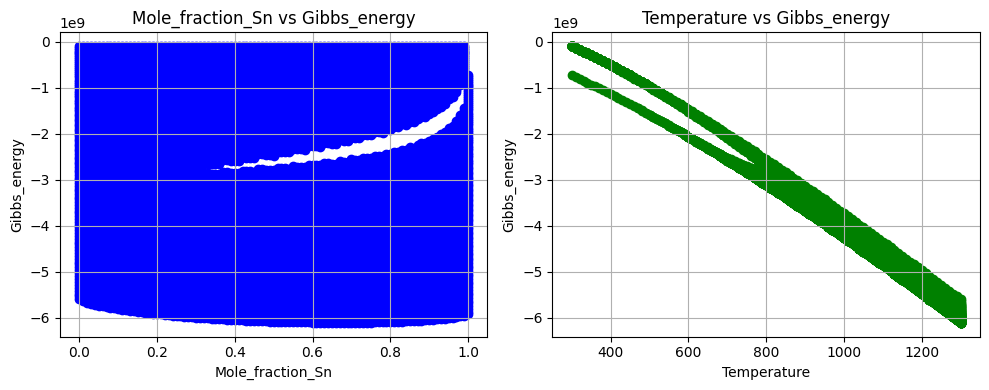

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = 'al_sn_liquid_1/al_sn_liquid_1.txt'  # Replace with your actual file path
df = pd.read_csv(file_path, delim_whitespace=True)

# Step 2: Create scatterplots
plt.figure(figsize=(10, 4))

# Scatterplot for Mole_fraction_Sn vs. Gibbs_energy
plt.subplot(1, 2, 1)
plt.scatter(df['Mole_fraction_Sn'], df['Gibbs_energy'], color='blue')
plt.title('Mole_fraction_Sn vs Gibbs_energy')
plt.xlabel('Mole_fraction_Sn')
plt.ylabel('Gibbs_energy')
plt.grid(True)

# Scatterplot for Temperature vs. Gibbs_energy
plt.subplot(1, 2, 2)
plt.scatter(df['Temperature'], df['Gibbs_energy'], color='green')
plt.title('Temperature vs Gibbs_energy')
plt.xlabel('Temperature')
plt.ylabel('Gibbs_energy')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


/tmp/ipykernel_568926/2833989640.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


10201


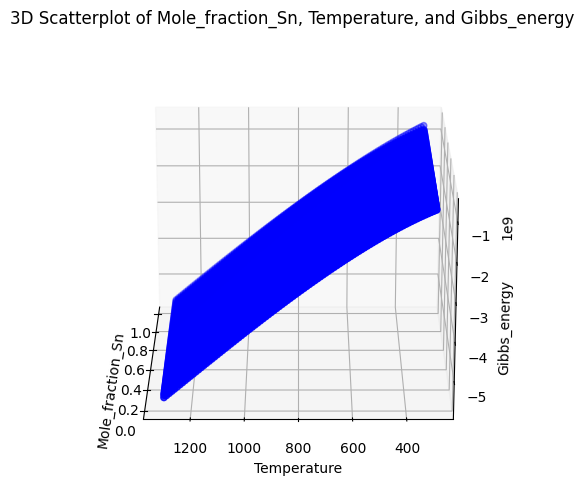

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Read the .txt file
file_path = 'al_sn_fcc_a1.txt'  # Replace with your actual file path
df = pd.read_csv(file_path, delim_whitespace=True)

print(len(df))

# Step 2: Create a 3D scatterplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
sc = ax.scatter(df['Mole_fraction_Sn'], df['Temperature_[K]'], df['Gibbs_energy_FCC_A1'], c='blue', marker='o')

# Setting labels and title
ax.set_xlabel('Mole_fraction_Sn')
ax.set_ylabel('Temperature')
ax.set_zlabel('Gibbs_energy')
ax.set_title('3D Scatterplot of Mole_fraction_Sn, Temperature, and Gibbs_energy')

# Optional: set an initial viewing angle
ax.view_init(elev=20, azim=180)  # Adjust elevation and azimuth

# Show the plot with interactive controls
plt.show()


/tmp/ipykernel_568926/2120306961.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


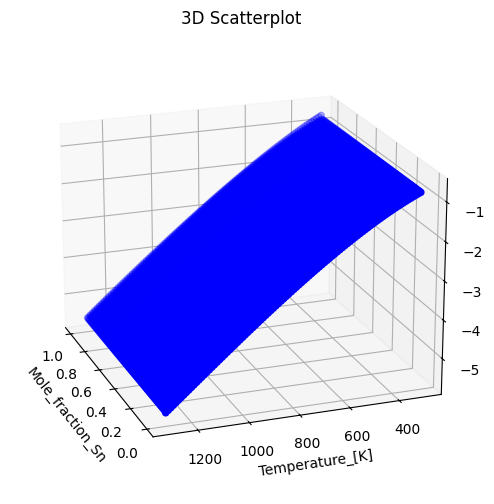

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(file_path):
    # Step 1: Read the .txt file
    df = pd.read_csv(file_path, delim_whitespace=True)
    
    # Step 2: Check the number of columns
    if df.shape[1] != 3:
        print("The dataset does not contain exactly three columns.")
        return
    
    # Step 3: Identify the independent and dependent variables
    # Assuming the dependent variable is 'Gibbs_energy'
    dependent_var = None
    independent_vars = []
    
    for col in df.columns:
        if 'gibbs' in col.lower():
            dependent_var = col
        else:
            independent_vars.append(col)
    
    # Ensure we have exactly one dependent variable and two independent variables
    if dependent_var and len(independent_vars) == 2:
        # Step 4: Create a 3D scatterplot
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Plotting the data
        sc = ax.scatter(df[independent_vars[0]], df[independent_vars[1]], df[dependent_var], c='blue', marker='o')

        # Setting labels and title
        ax.set_xlabel(independent_vars[0])
        ax.set_ylabel(independent_vars[1])
        ax.set_zlabel(dependent_var)
        ax.set_title('3D Scatterplot')

        # Optional: set an initial viewing angle
        ax.view_init(elev=20, azim=160)  # Adjust elevation and azimuth

        # Show the plot with interactive controls
        plt.show()
    else:
        print("The dataset does not contain exactly two independent variables and one dependent variable.")

# Example usage:
file_path = 'al_sn_fcc_a1.txt'  # Replace with your actual file path
plot_3d_scatter(file_path)


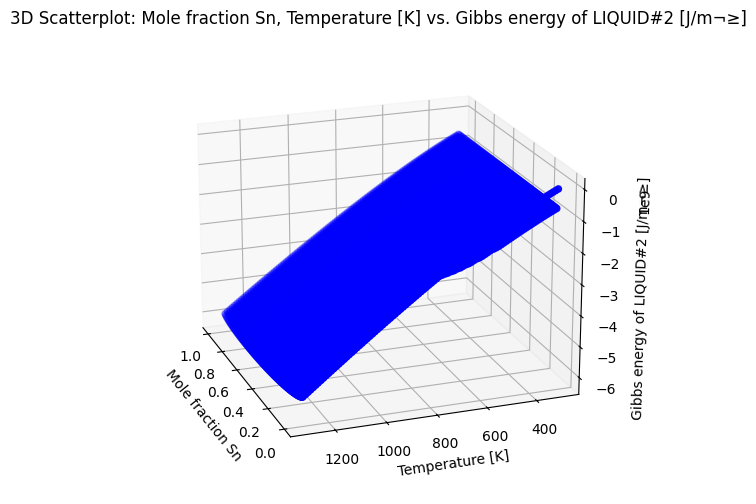

2D scatterplot saved as 'scatter_Mole fraction Sn_vs_Gibbs energy of LIQUID#2 [J/m¬≥].png'


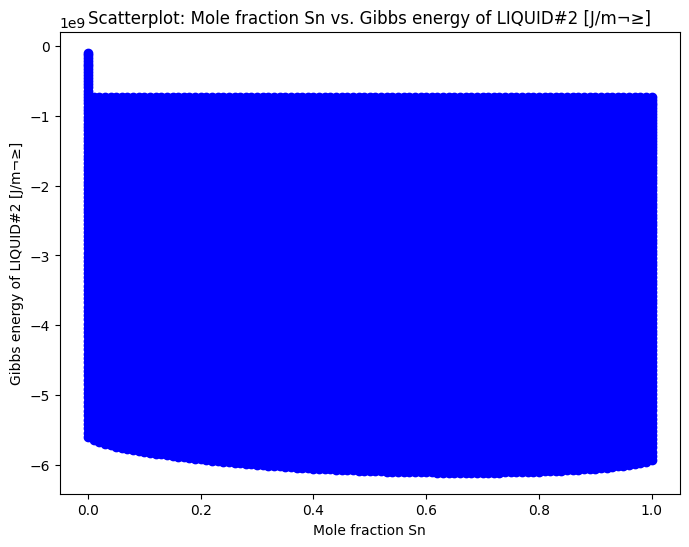

2D scatterplot saved as 'scatter_Temperature [K]_vs_Gibbs energy of LIQUID#2 [J/m¬≥].png'


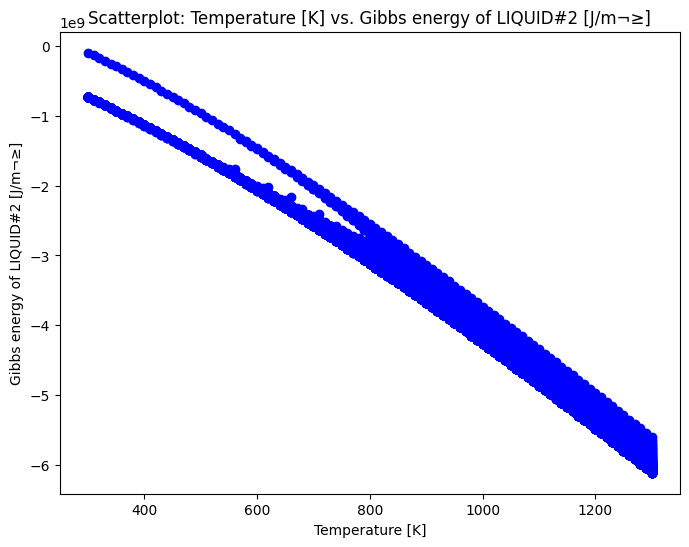

Correlation matrix saved as 'correlation_matrix.png'


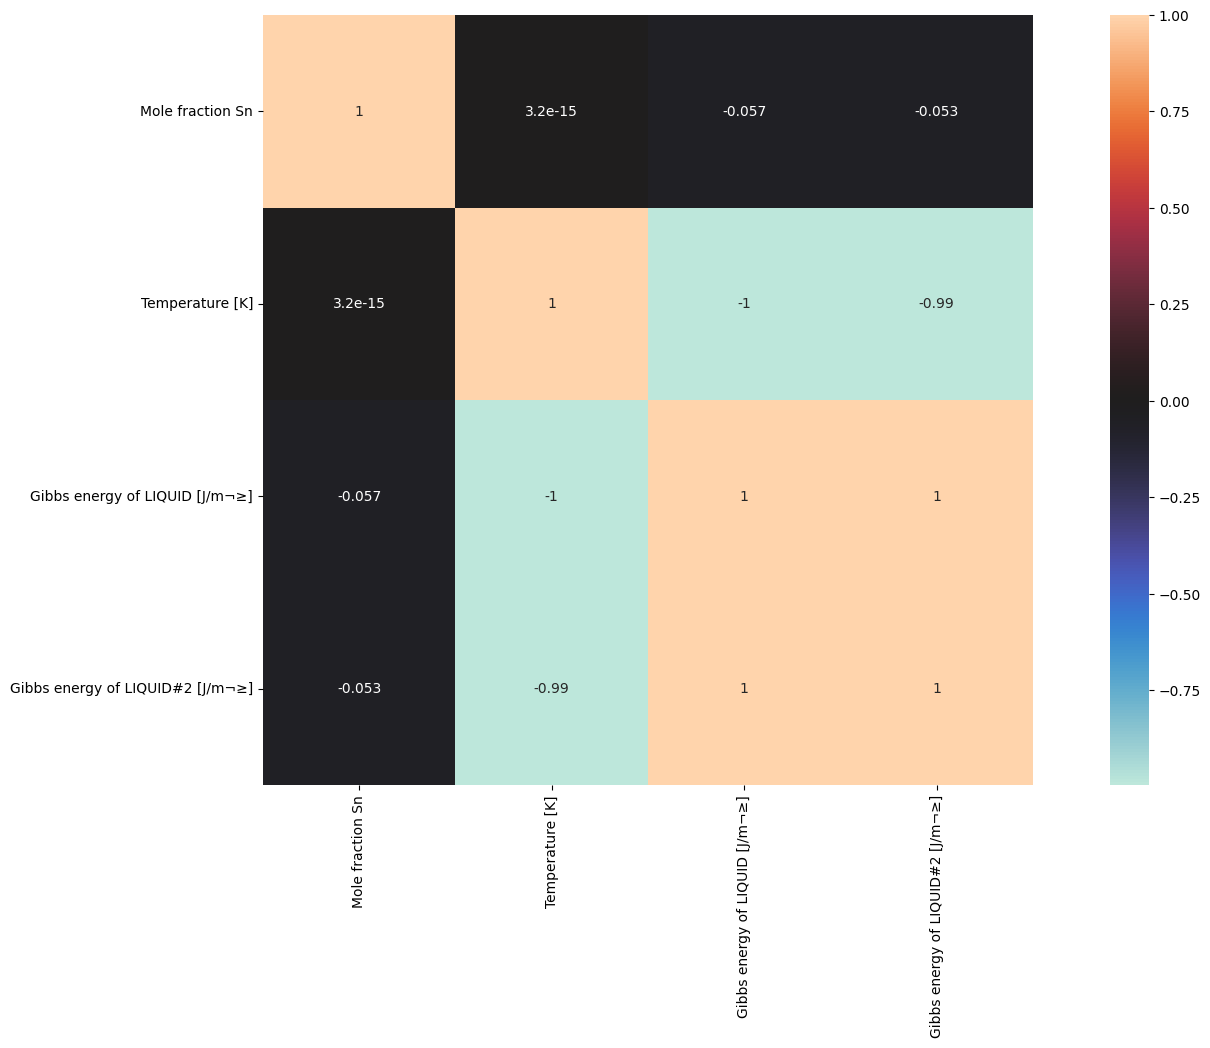

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter_plots(file_path, plot_corr_matrix=True):

    if file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    elif file_path.endswith('.txt'):
        df = pd.read_csv(file_path, delim_whitespace=True)
    else:
        print("Unsupported file format. Please use .txt or .xlsx files.")
        return
    
    # Step 2: Identify the dependent and independent variables
    dependent_var = None
    independent_vars = []
    
    for col in df.columns:
        if 'gibbs' in col.lower():
            dependent_var = col
        else:
            independent_vars.append(col)
    
    # Check if we found the dependent variable
    if not dependent_var:
        print("No dependent variable containing 'gibbs' found.")
        return

    if len(independent_vars) < 2:
        print("Not enough independent variables for 3D plotting.")

    elif len(independent_vars) == 2:
        # Step 4: Create a 3D scatterplot
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Plotting the data
        ax.scatter(df[independent_vars[0]], df[independent_vars[1]], df[dependent_var], c='blue', marker='o')

        # Setting labels and title
        ax.set_xlabel(independent_vars[0])
        ax.set_ylabel(independent_vars[1])
        ax.set_zlabel(dependent_var)
        ax.set_title(f'3D Scatterplot: {independent_vars[0]}, {independent_vars[1]} vs. {dependent_var}')

        ax.view_init(elev=20, azim=160)  # Adjust elevation and azimuth

        # Show the 3D plot
        plt.show()
    else:
        print("The dataset has more than 3 columns. Proceeding to create 2D scatter plots.")

    # Step 3: Create 2D scatterplots for each independent variable against the dependent variable
    for x_col in independent_vars:
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Plotting the data
        ax.scatter(df[x_col], df[dependent_var], c='blue', marker='o')
        
        # Setting labels and title
        ax.set_xlabel(x_col)
        ax.set_ylabel(dependent_var)
        ax.set_title(f'Scatterplot: {x_col} vs. {dependent_var}')
        
        # Save the 2D scatterplot
        file_name = f'scatter_{x_col}_vs_{dependent_var}.png'
        #plt.savefig(file_name)
        print(f"2D scatterplot saved as '{file_name}'")
        
        # Show the 2D plot
        plt.show()

    # Step 4: Filter numeric columns and plot the correlation matrix if flag is True
    if plot_corr_matrix:
        # Select only numeric columns
        numeric_df = df.select_dtypes(include=[float, int])
        
        # Compute the correlation matrix
        corr_mat = numeric_df.corr(method='pearson')
        
        # Plot the heatmap
        plt.figure(figsize=(20, 10))
        sns.heatmap(corr_mat, vmax=1, square=True, annot=True, cmap='icefire')
        
        # Save and show the correlation matrix
        corr_file_name = 'correlation_matrix.png'
        #plt.savefig(corr_file_name)
        print(f"Correlation matrix saved as '{corr_file_name}'")
        
        plt.show()

# Example usage:
file_path = 'al_sn_liquid_1_and_2.xlsx'  # Replace with your actual file path
plot_scatter_plots(file_path)


# al_sn_liquid_gibbs_mole_frac.txt DOES HAVE A CORRELATION BTWN MOLE FRACTION SN AND GIBBS



In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, SGDRegressor, ElasticNet, 
                                  ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, 
                                  OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, 
                                  ARDRegression, BayesianRidge, MultiTaskElasticNet, MultiTaskElasticNetCV,
                                  MultiTaskLasso, MultiTaskLassoCV, HuberRegressor, QuantileRegressor,
                                  RANSACRegressor, TheilSenRegressor, GammaRegressor, PoissonRegressor,
                                  TweedieRegressor, PassiveAggressiveRegressor)

# Function to plot predictions vs. true values and print MSE for training and testing
def plot_predictions_and_print_mse(model, x_train, y_train, x_test, y_test, model_name, decimal_places, plot=True, print_mse=True):
    # Predict the target values
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate MSE for training and testing sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Print MSE for training and testing sets if print_mse is True
    if print_mse:
        print(f"MSE for {model_name} - Training Set: {mse_train:.{decimal_places}f}")
        print(f"MSE for {model_name} - Testing Set: {mse_test:.{decimal_places}f}")
    
    # Plot predictions vs. true values if plot is True
    if plot:
        # Create a DataFrame for plotting
        preds = pd.DataFrame({"preds": y_test_pred.squeeze(), "true": y_test.squeeze()})
        preds["residuals"] = preds["true"] - preds["preds"]

        # Set the plot size
        plt.figure(figsize=(6.0, 6.0))
        
        # Plot predictions vs. true values
        ax = preds.plot(x="true", y="preds", kind="scatter", color='blue', label='Prediction')
        preds.plot(x="true", y="true", color="red", kind="scatter", ax=ax, label='Ground Truth')
        
        # Add title and legend
        plt.title(f"Prediction vs. True Values ({model_name})")
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.legend()
        
        # Show plot
        plt.show()

    return mse_train, mse_test

# Assuming X_std and y_std are your feature and target arrays
# Parameters
prop_samples_for_train = 0.75
n_splits = 10  # Number of different train-test splits

# List of models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "RidgeCV": RidgeCV(),
    "SGDRegressor": SGDRegressor(),
    "ElasticNet": ElasticNet(alpha=1.0),
    "ElasticNetCV": ElasticNetCV(),
    "Lars": Lars(),
    "LarsCV": LarsCV(),
    "Lasso": Lasso(alpha=1.0),
    "LassoCV": LassoCV(),
    "LassoLars": LassoLars(),
    "LassoLarsCV": LassoLarsCV(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
    "OrthogonalMatchingPursuitCV": OrthogonalMatchingPursuitCV(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "MultiTaskElasticNet": MultiTaskElasticNet(),
    "MultiTaskElasticNetCV": MultiTaskElasticNetCV(),
    "MultiTaskLasso": MultiTaskLasso(),
    "MultiTaskLassoCV": MultiTaskLassoCV(),
    "HuberRegressor": HuberRegressor(),
    "QuantileRegressor": QuantileRegressor(),
    "RANSACRegressor": RANSACRegressor(),
    "TheilSenRegressor": TheilSenRegressor(),
    "GammaRegressor": GammaRegressor(),
    "PoissonRegressor": PoissonRegressor(),
    "TweedieRegressor": TweedieRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    # "K-Nearest Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    # "Decision Tree Regressor": DecisionTreeRegressor(max_depth=None),
    # "Kernel Ridge Regression": KernelRidge(alpha=1.0, kernel='rbf'), takes too long and is high loss
}

# Dictionary to store MSE values
mse_results = {}

# Define the number of decimal places for formatting
decimal_places = 10

# Loop through models and perform n_splits cross-validation
for name, model in models.items():
    if hasattr(model, 'fit'):
        try:
            mse_train_splits = []
            mse_test_splits = []
            
            for i in range(n_splits):
                # Split the data into training and test sets
                x_train, x_test, y_train, y_test = train_test_split(
                    X_std, 
                    y_std, 
                    test_size=1 - prop_samples_for_train,  
                    random_state=i  # Seed for reproducibility, changes each split
                )
                
                model.fit(x_train, y_train)
                mse_train, mse_test = plot_predictions_and_print_mse(model, x_train, y_train, x_test, y_test, name, decimal_places, plot=False, print_mse=False)
                
                mse_train_splits.append(mse_train)
                mse_test_splits.append(mse_test)

            mse_results[name] = {
                "MSE Train": mse_train_splits,
                "MSE Test": mse_test_splits
            }
        
        except Exception as e:
            print(f"Error with {name}: {e}")

# Sort models by average test MSE and get the top n models
top_n = 5  # Adjust this number to the desired number of top models
sorted_models = sorted(mse_results.items(), key=lambda item: np.mean(item[1]["MSE Test"]))
top_models = sorted_models[:top_n]

print(f"Top {top_n} models with lowest average test MSE:")
for model_name, mse in top_models:
    print(f"{model_name}: Testing MSE = {np.mean(mse['MSE Test']):.{decimal_places}f}")

# Save results to a text file
with open("model_performance_no_std.txt", "w") as f:
    for model_name, mse in mse_results.items():
        f.write(f"{model_name}:\n")
        for i in range(n_splits):
            f.write(f"  Split {i+1} - Training MSE: {mse['MSE Train'][i]:.{decimal_places}f}, Testing MSE: {mse['MSE Test'][i]:.{decimal_places}f}\n")
    
    f.write("\nTop Models with Lowest Average Test MSE:\n")
    for model_name, mse in top_models:
        f.write(f"{model_name}: Testing MSE = {np.mean(mse['MSE Test']):.{decimal_places}f}\n")

print(f"Results saved to 'model_performance.txt'.")

# Save results to a CSV file
# Convert the results into a DataFrame where each row corresponds to one split
all_results = []
for model_name, mse in mse_results.items():
    for i in range(n_splits):
        all_results.append({
            "Model": model_name,
            "Split": i + 1,
            "Training MSE": mse['MSE Train'][i],
            "Testing MSE": mse['MSE Test'][i]
        })

results_df = pd.DataFrame(all_results)
results_df.to_csv("model_performance_no_std.csv", index=False)

print(f"Results saved to 'model_performance.csv'.")


/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/valid

Error with GammaRegressor: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
Error with PoissonRegressor: Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
Top 5 models with lowest average test MSE:
RANSACRegressor: Testing MSE = 17105763242781162.0000000000
RidgeCV: Testing MSE = 17106042056802762.0000000000
Linear Regression: Testing MSE = 17106042538869220.0000000000
Lars: Testing MSE = 17106042538869228.0000000000
LarsCV: Testing MSE = 17106042538869228.0000000000
Results saved to 'model_performance.txt'.
Results saved to 'model_performance.csv'.


/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/valid

In [32]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.multicomp as mc

# Step 1: Load the CSV file
file_path = 'al_sn_liquid_1/model_performance_.8.csv'  # Replace with your actual file path
results_df = pd.read_csv(file_path)

# Set the number of decimal places for rounding
decimal_places = 10

# Step 2: Perform ANOVA on the Testing MSE
anova_result = stats.f_oneway(
    *(results_df[results_df['Model'] == model]['Testing MSE'] for model in results_df['Model'].unique())
)

# Print the ANOVA p-value, rounded to the specified number of decimal places
print(f"ANOVA p-value: {anova_result.pvalue:.{decimal_places}f}")

# Initialize a list to store result strings for saving to a file
results_text = []

# Append ANOVA result to the list, rounded to the specified number of decimal places
results_text.append(f"ANOVA p-value: {anova_result.pvalue:.{decimal_places}f}\n")

# Step 3: Post-hoc analysis if ANOVA is significant
if anova_result.pvalue < 0.05:
    print("Significant differences found, proceeding with post-hoc tests.")
    
    # Perform pairwise comparisons using Tukey's HSD
    comp = mc.MultiComparison(results_df['Testing MSE'], results_df['Model'])
    post_hoc_res = comp.tukeyhsd()
    
    # Print and store the post-hoc test results
    print(post_hoc_res.summary())
    results_text.append("Significant differences found. Post-hoc pairwise comparisons (Tukey's HSD):\n")
    results_text.append(post_hoc_res.summary().as_text())
    
    # Step 4: Determine the best model
    means = results_df.groupby('Model')['Testing MSE'].mean()
    best_model_name = means.idxmin()
    best_model_mse = means.min()

    # Check if the best model is statistically different from the others
    significant = post_hoc_res.reject[post_hoc_res.meandiffs.argmin()]

    if significant:
        results_text.append(f"\nBest Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (statistically different from others)\n")
        print(f"Best Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (statistically different from others)")
    else:
        results_text.append(f"\nBest Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (not statistically different from others)\n")
        print(f"Best Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (not statistically different from others)")
else:
    print("No significant differences found between models.")
    results_text.append("No significant differences found between models.\n")
    
    # Select the model with the lowest average MSE as the best model
    means = results_df.groupby('Model')['Testing MSE'].mean()
    best_model_name = means.idxmin()
    best_model_mse = means.min()

    results_text.append(f"\nBest Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (based on lowest MSE)\n")
    print(f"Best Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (based on lowest MSE)")

# Step 5: Write the results to a file
output_file = "anova_results.txt"
with open(output_file, "w") as f:
    f.writelines(results_text)

print(f"ANOVA and post-hoc results saved to '{output_file}'.")


ANOVA p-value: 0.0000000000
Significant differences found, proceeding with post-hoc tests.
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
           group1                      group2           meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------------------------------
              ARDRegression               BayesianRidge      0.0   1.0  -0.011   0.011  False
              ARDRegression                  ElasticNet   0.4464   0.0  0.4355  0.4574   True
              ARDRegression                ElasticNetCV      0.0   1.0 -0.0109   0.011  False
              ARDRegression              HuberRegressor   0.0001   1.0 -0.0108  0.0111  False
              ARDRegression                        Lars      0.0   1.0  -0.011   0.011  False
              ARDRegression                      LarsCV      0.0   1.0  -0.011   0.011  False
              ARDRegression                       Lasso   0.995

In [35]:
import pandas as pd

# Step 1: Load the CSV file
file_path = 'model_performance_.75.csv'  # Replace with your actual file path
results_df = pd.read_csv(file_path)

# Step 2: Filter the results for "Linear Regression" model
linear_regression_results = results_df[results_df['Model'] == "Linear Regression"]

# Step 3: Calculate the average Testing MSE
average_testing_mse = linear_regression_results['Testing MSE'].mean()

# Step 4: Set the number of decimal places for rounding
decimal_places = 10

# Step 5: Print the average Testing MSE, rounded to the specified number of decimal places
print(f"Average Testing MSE for Linear Regression: {average_testing_mse:.{decimal_places}f}")


Average Testing MSE for Linear Regression: 0.0053219618


In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.multicomp as mc

# Step 1: Load the CSV file
file_path = 'model_performance_.75.csv'  # Replace with your actual file path
results_df = pd.read_csv(file_path)

# Set the number of decimal places for rounding
decimal_places = 10

# Step 2: Perform ANOVA on the Testing MSE
anova_result = stats.f_oneway(
    *(results_df[results_df['Model'] == model]['Testing MSE'] for model in results_df['Model'].unique())
)

# Print the ANOVA p-value, rounded to the specified number of decimal places
print(f"ANOVA p-value: {anova_result.pvalue:.{decimal_places}f}")

# Initialize a list to store result strings for saving to a file
results_text = []

# Append ANOVA result to the list, rounded to the specified number of decimal places
results_text.append(f"ANOVA p-value: {anova_result.pvalue:.{decimal_places}f}\n")

# Step 3: Post-hoc analysis if ANOVA is significant
if anova_result.pvalue < 0.05:
    print("Significant differences found, proceeding with post-hoc tests.")
    
    # Perform pairwise comparisons using Tukey's HSD
    comp = mc.MultiComparison(results_df['Testing MSE'], results_df['Model'])
    post_hoc_res = comp.tukeyhsd()
    
    # Print and store the post-hoc test results
    print(post_hoc_res.summary())
    results_text.append("Significant differences found. Post-hoc pairwise comparisons (Tukey's HSD):\n")
    results_text.append(post_hoc_res.summary().as_text())
    
    # Step 4: Determine the best model
    means = results_df.groupby('Model')['Testing MSE'].mean()
    best_model_name = means.idxmin()
    best_model_mse = means.min()

    # Check if the best model is statistically different from the others
    significant = post_hoc_res.reject[post_hoc_res.meandiffs.argmin()]

    if significant:
        results_text.append(f"\nBest Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (statistically different from others)\n")
        print(f"Best Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (statistically different from others)")
    else:
        results_text.append(f"\nBest Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (not statistically different from others)\n")
        print(f"Best Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (not statistically different from others)")
else:
    print("No significant differences found between models.")
    results_text.append("No significant differences found between models.\n")
    
    # Select the model with the lowest average MSE as the best model
    means = results_df.groupby('Model')['Testing MSE'].mean()
    best_model_name = means.idxmin()
    best_model_mse = means.min()

    results_text.append(f"\nBest Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (based on lowest MSE)\n")
    print(f"Best Model: {best_model_name} with Testing MSE = {best_model_mse:.{decimal_places}f} (based on lowest MSE)")

# Step 5: Write the results to a file
output_file = "anova_results.txt"
with open(output_file, "w") as f:
    f.writelines(results_text)

print(f"ANOVA and post-hoc results saved to '{output_file}'.")


ANOVA p-value: 0.0000000000
Significant differences found, proceeding with post-hoc tests.
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
              ARDRegression               BayesianRidge      0.0    1.0 -0.0089  0.0089  False
              ARDRegression                  ElasticNet   0.4465    0.0  0.4375  0.4554   True
              ARDRegression                ElasticNetCV      0.0    1.0 -0.0089  0.0089  False
              ARDRegression              HuberRegressor   0.0001    1.0 -0.0088  0.0091  False
              ARDRegression                        Lars      0.0    1.0 -0.0089  0.0089  False
              ARDRegression                      LarsCV      0.0    1.0 -0.0089  0.0089  False
              ARDRegression                       Lass

**Linear Regression**

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(x_train, y_train)

# Get the coefficients and intercept of the trained model
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Predict the target values for the training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate MAPE for the training set
train_error = 0
for i in range(len(y_train)):
    train_error += abs(y_train[i] - y_train_pred[i]) / y_train[i]

mape_train = (train_error / len(y_train)) * 100

# Calculate MAPE for the test set
test_error = 0
for i in range(len(y_test)):
    test_error += abs(y_test[i] - y_test_pred[i]) / y_test[i]

mape_test = (test_error / len(y_test)) * 100

# Calculate MSE for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

print(intercept)

# Output the formula, MAPE, and MSE
print(f"Formula: y = {intercept:.4f} + {coefficients[0]:.4f} * Mole_fraction_Sn + {coefficients[1]:.4f} * Temperature")
print(f"MAPE on Training Set: {mape_train[0]:.4f}%")
print(f"MAPE on Test Set: {mape_test[0]:.4f}%")
print(f"MSE on Training Set: {mse_train:.6f}")
print(f"MSE on Test Set: {mse_test:.6f}")


-9.779038602510332e-05
Formula: y = -0.0001 + -0.0565 * Mole_fraction_Sn + -0.9959 * Temperature
MAPE on Training Set: 1.8400%
MAPE on Test Set: -3.5642%
MSE on Training Set: 0.005311
MSE on Test Set: 0.005242


**Ridge Regression**

In [139]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the model
model = Ridge(alpha=1.0)

# Train the model
model.fit(x_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Predict the target values
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate MAPE for the training set
mape_train = (abs(y_train - y_train_pred) / y_train).mean() * 100

# Calculate MAPE for the test set
mape_test = (abs(y_test - y_test_pred) / y_test).mean() * 100

# Calculate MSE for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Formula: y = {intercept:.4f} + {coefficients[0]:.4f} * Mole_fraction_Sn + {coefficients[1]:.4f} * Temperature")
print(f"MAPE on Training Set: {mape_train:.4f}%")
print(f"MAPE on Test Set: {mape_test:.4f}%")
print(f"MSE on Training Set: {mse_train:.6f}")
print(f"MSE on Test Set: {mse_test:.6f}")


Formula: y = -0.0001 + -0.0565 * Mole_fraction_Sn + -0.9958 * Temperature
MAPE on Training Set: 1.8382%
MAPE on Test Set: -3.5652%
MSE on Training Set: 0.005311
MSE on Test Set: 0.005242


In [41]:
from statistics import mean

**Lasso Regression**

In [140]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the model
model = Lasso(alpha=1.0)

# Train the model
model.fit(x_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Predict the target values
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate MAPE for the training set
mape_train = (abs(y_train - y_train_pred) / np.abs(y_train)).mean() * 100

# Calculate MAPE for the test set
mape_test = (abs(y_test - y_test_pred) / np.abs(y_test)).mean() * 100

# Calculate MSE for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# # Print results
# print(f"Formula: y = {intercept:.4f} + {', '.join(f'{coef:.4f} * Feature_{i}' for i, coef in enumerate(coefficients))}")
# print(f"MAPE on Training Set: {mape_train:.4f}%")
# print(f"MAPE on Test Set: {mape_test:.4f}%")
print(f"MSE on Training Set: {mse_train:.6f}")
print(f"MSE on Test Set: {mse_test:.6f}")


MSE on Training Set: 0.998501
MSE on Test Set: 1.004541


In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the model with a more reasonable max_depth
model = DecisionTreeRegressor(max_depth=None)  # max_depth=None allows for unlimited depth

# Train the model
model.fit(x_train, y_train)

# Predict the target values
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate MAPE for the training set
mape_train = (abs(y_train - y_train_pred) / np.abs(y_train)).mean() * 100

# Calculate MAPE for the test set
mape_test = (abs(y_test - y_test_pred) / np.abs(y_test)).mean() * 100

# Calculate MSE for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"MAPE on Training Set: {mape_train:.4f}%")
print(f"MAPE on Test Set: {mape_test:.4f}%")
print(f"MSE on Training Set: {mse_train:.6f}")
print(f"MSE on Test Set: {mse_test:.6f}")


MAPE on Training Set: 547.4156%
MAPE on Test Set: 545.1717%
MSE on Training Set: 0.000000
MSE on Test Set: 0.000295


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

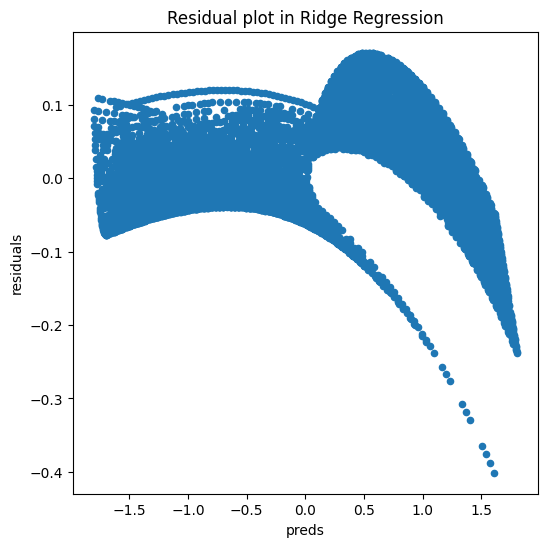

In [110]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(x_train).squeeze(), "true":y_train.squeeze()})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

**Knn Algorithm**

In [68]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)
y1_knn=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_train[i])/y_train[i])
train_error_knn=error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn=knn.predict(x_test)
y2_knn=list(y2_knn)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-y_test[i])/y_test[i])
test_error_knn=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")

Train error = [-0.36789147] percent in Knn algorithm
Test error = [6.9052925] percent in knn algorithm


Text(0.5, 1.0, 'Residual plot in Knn')

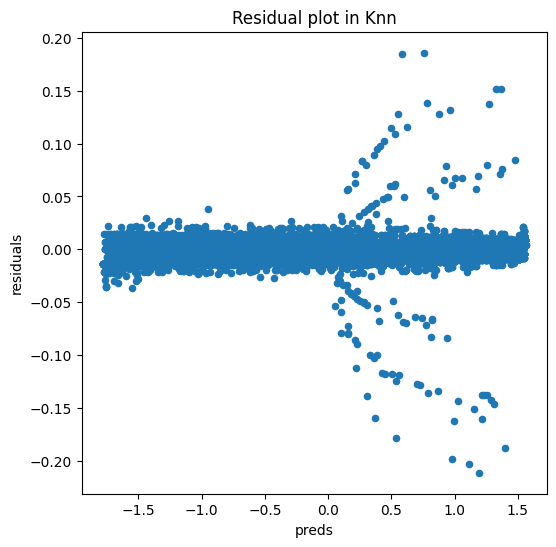

In [69]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train).squeeze(), "true":y_train.squeeze()})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

**Bayesian Regression**

In [70]:
reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)
y1_reg=reg.predict(x_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(x_test)
y2_reg=list(y2_reg)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_reg[i]-y_train[i])/y_train[i])
train_error_bay=error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_reg[i]-y_test[i])/y_test[i])
test_error_bay=(error/len(y_test))*100
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

Train error = [-2.26824756] percent in Bayesian Regression
Test error = [-0.00010006] percent in Bayesian Regression


/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

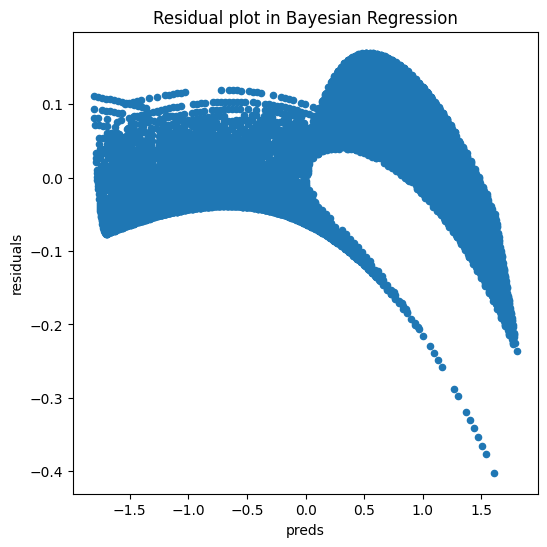

In [71]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":reg.predict(x_train).squeeze(), "true":y_train.squeeze()})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

**Gradient boosted Tree Regressor (xgboost)**

In [72]:
dec = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec=list(y2_dec)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_train[i])/y_train[i])
train_error_tree=error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-y_test[i])/y_test[i])
test_error_tree=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

Train error = [-1.05651492] percent in Decision Tree Regressor
Test error = [180.71836359] percent in Decision Tree Regressor


Text(0.5, 1.0, 'Residual plot in Decision Tree')

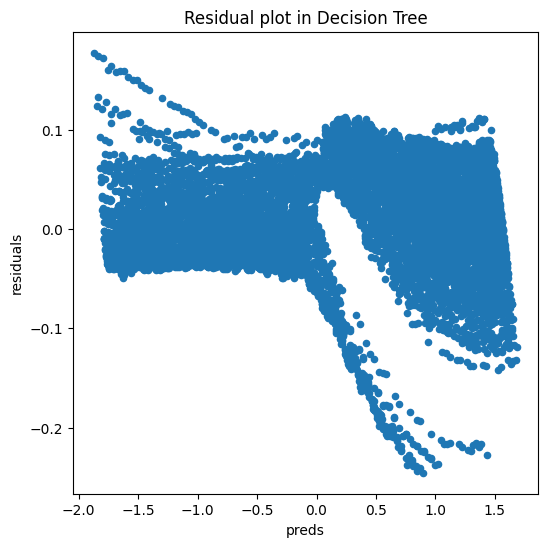

In [73]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train).squeeze(), "true":y_train.squeeze()})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

**SVM**

In [74]:
svm_reg=svm.SVR()
svm_reg.fit(x_train,y_train)
y1_svm=svm_reg.predict(x_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(x_test)
y2_svm=list(y2_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_train[i])/y_train[i])
train_error_svm=error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-y_test[i])/y_test[i])
test_error_svm=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

/home/couchbucks/Documents/saketh/regression/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error = [-5.39869637] percent in SVM Regressor
Test error = [-0.66912271] percent in SVM Regressor


Text(0.5, 1.0, 'Residual plot in SVM')

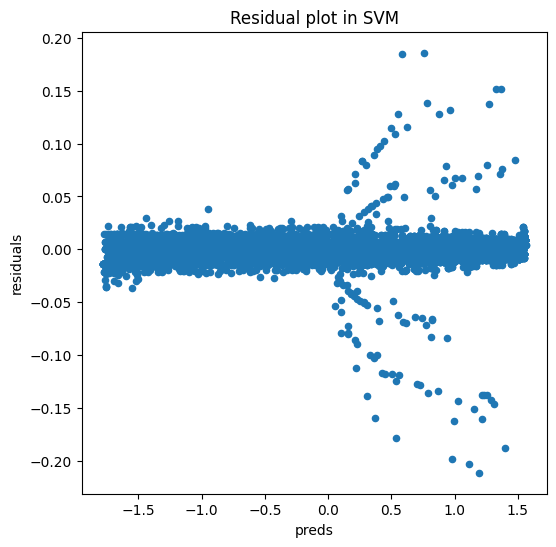

In [75]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train).squeeze(), "true":y_train.squeeze()})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

In [ ]:
class linearRegression(nn.Module): # all the dependencies from torch will be given to this class [parent class] # nn.Module contains all the building block of neural networks:
  def __init__(self,input_dim):
    super(linearRegression,self).__init__()  # building connection with parent and child classes
    self.enc_fc1=nn.Linear(input_dim,16)          # hidden layer 1
    self.enc_fc2=nn.Linear(16,8)                  # hidden layer 2
    self.enc_fc3=nn.Linear(8,4)                   # hidden layer 3
    self.dec_fc1=nn.Linear(4,8)
    self.dec_fc2=nn.Linear(8,16)

    self.dec_recon=nn.Linear(16,input_dim)          # decoder for reconstruction
    self.dec_regression=nn.Linear(4,1)                   # last layer
  
  def encoder(self,d):
    out=torch.relu(self.enc_fc1(d))              # input * weights + bias for layer 1
    out=torch.relu(self.enc_fc2(out))            # input * weights + bias for layer 2
    out=torch.relu(self.enc_fc3(out))            # input * weights + bias for layer 3
    return out  

  def decoder(self,d):
    out=torch.relu(self.dec_fc1(d))              # input * weights + bias for layer 1
    out=torch.relu(self.dec_fc2(out))            # input * weights + bias for layer 2      
    return out  

  def forward(self,d):
    # out=torch.relu(self.fc1(d))              # input * weights + bias for layer 1
    # out=torch.relu(self.fc2(out))            # input * weights + bias for layer 2
    # out=torch.relu(self.fc3(out))            # input * weights + bias for layer 3
    # out=(self.fc1(d))              # input * weights + bias for layer 1
    # out=(self.fc2(out))            # input * weights + bias for layer 2
    # out=torch.relu(self.fc3(out))            # input * weights + bias for layer 3
    enc_out=self.encoder(d)
    dec_out=self.decoder(enc_out)
    recon=self.dec_recon(dec_out)  
    reg=self.dec_regression(enc_out)         # input * weights + bias for last layer
    return recon, reg                               # final outcome


In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, z_dim=2):
        super(VAE, self).__init__()
        self.input_dim = input_dim
        self.z_dim = z_dim

        self.fc1 = nn.Linear(self.input_dim, 100)
        self.fc1_2 = nn.Linear(100, 50)
        self.fc1_3 = nn.Linear(50, 50)
        self.fc21 = nn.Linear(50, self.z_dim)
        self.fc22 = nn.Linear(50, self.z_dim)
        self.fc3 = nn.Linear(self.z_dim, 50)
        self.fc3_1 = nn.Linear(50, 50)
        self.fc3_2 = nn.Linear(50, 100)
        self.fc4 = nn.Linear(100, self.input_dim)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        h2 = self.relu(self.fc1_2(h1))
        h3 = self.relu(self.fc1_3(h2))
        return self.fc21(h3), self.fc22(h3)
        # return self.fc21(h1), self.relu(self.fc22(h1))

    def reparameterize(self, mu, logvar):
        if self.training:
            # Logvar
            std = logvar.mul(0.5).exp_()
            # Var
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        h3 = self.relu(self.fc3(z))
        h4 = self.relu(self.fc3_1(h3))
        h5 = self.relu(self.fc3_2(h4))
        return self.sigmoid(self.fc4(h5))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, self.input_dim))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

    # Reconstruction + KL divergence losses summed over all elements and batch
    def loss_function(self, recon_x, x, mu, logvar):
        REC = torch.mean(
            ((recon_x - x.view(-1, self.input_dim)) ** 2).sum(dim=1))

        # see Appendix B from VAE paper:
        # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
        # https://arxiv.org/abs/1312.6114
        # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)

        # Logvar
        KLD = -0.5 * torch.mean((1 + logvar - mu.pow(2) - logvar.exp()).sum(dim=1))
        loss = REC + KLD
        return loss, REC, KLD

In [163]:
input_dim=x_train.shape[1]
torch.manual_seed(42)  # to make initilized weights stable:
dlmodel_reg=linearRegression(input_dim)

X_train_torch = torch.tensor(x_train, dtype=torch.float32)
X_test_torch = torch.tensor(x_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

# select loss and optimizers

loss=nn.MSELoss() # loss function
optimizers=optim.Adam(params=dlmodel_reg.parameters(),lr=0.01)

# training the model:
num_of_epochs=500
for i in range(num_of_epochs):
  # give the input data to the architecure
  [X_train_recon,y_train_prediction]=dlmodel_reg(X_train_torch)  # model initilizing
  loss1=loss(X_train_recon, X_train_torch)
  loss2=loss(y_train_prediction.squeeze(),y_train_torch)   # find the loss function:
  loss_value=loss1+loss2  
  optimizers.zero_grad() # make gradients zero for every iteration so next iteration it will be clear
  loss_value.backward()  # back propagation
  optimizers.step()  # update weights in NN

  # print the loss in training part:
  if i % 10 == 0:
    print(f'[epoch:{i}]: The loss value for training part={loss_value}')

with torch.no_grad():
    [_, y1_dl_regression] = dlmodel_reg(X_train_torch)
    [_, y2_dl_regression] = dlmodel_reg(X_test_torch)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dl_regression[i]-y_train_torch[i])/y_train_torch[i])
train_error_dl=error/len(y_train_torch)*100
print("Train error = "+'{}'.format(train_error_dl)+" percent"+" in DL regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_dl_regression[i]-y_test_torch[i])/y_test_torch[i])
test_error_dl=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_dl)+" percent in DL Regressor")

# with torch.no_grad():
#   dlmodel_reg.eval()   # make model in evaluation stage
#   y_test_prediction=model(X_test)
#   test_loss=loss(y_test_prediction.squeeze(),y_test)
#   print(f'Test loss value : {test_loss.item():.4f}')

[epoch:0]: The loss value for training part=2.0114078521728516
[epoch:10]: The loss value for training part=1.9162933826446533
[epoch:20]: The loss value for training part=1.6424895524978638
[epoch:30]: The loss value for training part=1.5590813159942627
[epoch:40]: The loss value for training part=1.520595908164978
[epoch:50]: The loss value for training part=1.5061206817626953
[epoch:60]: The loss value for training part=1.4980806112289429
[epoch:70]: The loss value for training part=1.4925541877746582
[epoch:80]: The loss value for training part=1.485205888748169
[epoch:90]: The loss value for training part=1.4737659692764282
[epoch:100]: The loss value for training part=1.4553531408309937
[epoch:110]: The loss value for training part=1.4277969598770142
[epoch:120]: The loss value for training part=1.4003348350524902
[epoch:130]: The loss value for training part=1.3730487823486328
[epoch:140]: The loss value for training part=1.3365058898925781
[epoch:150]: The loss value for traini

In [76]:
#train_error=[train_error_ridge[0],train_error_knn[0],train_error_bay[0],train_error_tree[0],train_error_svm[0]]
#test_error=[test_error_ridge[0],test_error_knn[0],test_error_bay[0],test_error_tree[0],test_error_svm[0]]
# train_error=[train_error_ridge[0],train_error_knn[0],train_error_bay[0],train_error_svm[0], train_error_dl.item()]
# test_error=[test_error_ridge[0],test_error_knn[0],test_error_bay[0],test_error_svm[0], train_error_dl.item()]
train_error=[train_error_ridge[0],train_error_knn[0],train_error_bay[0],train_error_svm[0]]
test_error=[test_error_ridge[0],test_error_knn[0],test_error_bay[0],test_error_svm[0]]
col={'Train Error':train_error,'Test Error':test_error}
models=['Ridge Regression','Knn','Bayesian Regression','SVM']
# models=['Ridge Regression','Knn','Bayesian Regression','SVM','DL']
df=DataFrame(data=col,index=models)
df

,Train Error,Test Error
Ridge Regression,-2.269380,0.000000
Knn,-0.367891,6.905292
Bayesian Regression,-2.268248,-0.000100
SVM,-5.398696,-0.669123


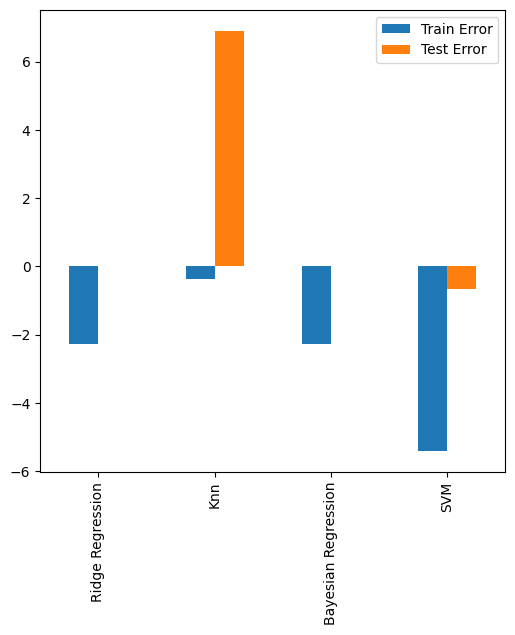

In [77]:
df.plot(kind='bar')
plt.savefig('methods_comparision_'+system+'.pdf') 

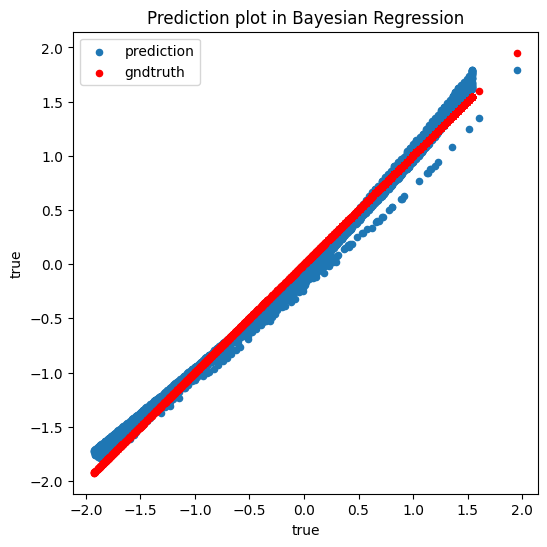

In [124]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":reg.predict(x_test).squeeze(), "true":y_test.squeeze()})
preds["residuals"] = preds["true"] - preds["preds"]
#preds.plot(x = "preds", y = "true",kind = "scatter")
#preds.plot(x = "gndtruth", y = "true", color="red")
ax = preds.plot(x="true", y = "preds", kind="scatter")
preds.plot(x="true", y = "true", color="red", kind="scatter", ax = ax)
plt.legend(['prediction','gndtruth'])
plt.title("Prediction plot in Bayesian Regression")
plt.savefig('best_method_prediction_'+system+'.pdf')
# plt.plot()
# preds = pd.DataFrame({"preds":y2_dl_regression.detach().numpy().squeeze(), "true":y_test.squeeze()})
# preds["residuals"] = preds["true"] - preds["preds"]
# #preds.plot(x = "preds", y = "true",kind = "scatter")
# #preds.plot(x = "gndtruth", y = "true", color="red")
# ax = preds.plot(x="true", y = "preds", kind="scatter")
# preds.plot(x="true", y = "true", color="red", kind="scatter", ax = ax)
# plt.legend(['prediction','gndtruth'])
# plt.title("Prediction plot in Deep Learning")
# plt.savefig('dl_prediction_'+system+'.pdf')


In [69]:
preds

,preds,true,gndtruth,residuals
0,0.731606,0.748503,0.748503,0.016897
1,-1.694362,-1.883322,-1.883322,-0.188960
2,-0.116016,-0.064155,-0.064155,0.051861
3,0.466463,0.494680,0.494680,0.028217
4,0.503001,0.522387,0.522387,0.019386
...,...,...,...,...
2546,-0.157767,-0.042316,-0.042316,0.115451
2547,1.211797,1.171095,1.171095,-0.040702
2548,0.826603,0.808281,0.808281,-0.018322
2549,-0.675531,-0.625603,-0.625603,0.049928
